# Programacion Dinamica Grafos



In [4]:
import numpy as np 

class abstract_graph:
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges} | {v for u,v in self.edges}
        
    def adjacency_matrix(self):
        pass
    
    def adjacency_list(self):
        pass

    
class simple_graph(abstract_graph):
    
    def __init__(self,_edges):
        tmp=[]
        for (u,v) in _edges:
            tmp.append((u,v))
            if (v,u) not in tmp and v!=u:
                tmp.append((v,u))
        self.edges=tmp
        self.nodes={u for u,v in _edges} | {v for u,v in _edges}
     
    def adjacency_matrix(self):
        # completar
        n=len(self.nodes)
        mat=np.zeros((n,n))
        for i,v in enumerate(self.nodes):
            for j,k in enumerate(self.nodes):
                if (v,k) in self.edges:
                    mat.at[i,j]=1.0
        return mat
    
    
    def adjacency_list(self):
        adjacent=lambda n : {v for u,v in self.edges if u==n } 
        return {v:adjacent(v) for v in self.nodes}

  
class weighted_graph(simple_graph):
    
    def __init__(self,_edges):
        tmp=dict()
        for (u,v),w in _edges.items():
            tmp.update({(u,v):w})
            if (v,u) not in tmp.keys() and v!=u:
                tmp.update({(v,u):w})
        self.edges=tmp
        self.nodes={u for u,v in _edges} | {v for u,v in _edges}

    def adjacency_matrix(self):
        # completar
        n=len(self.nodes)
        mat=np.zeros((n,n))
        for i,v in enumerate(self.nodes):
            for j,k in enumerate(self.nodes):
                if (v,k) in self.edges:
                    mat.at[i,j]=self.edges[(v,k)]
        return mat

In [6]:
from heapq import heappush,heappop
import numpy as np

def dijkstra(G,start):
    if start not in G.nodes:
        return None
    neighbors=G.adjacency_list()
    path={}    
    path.update({start:None})
    distance={v:float('inf') for v in G.nodes}
    distance.update({start:0})
    frontier=[]
    heappush(frontier,(0,start))
    while frontier:
        dist_u,u=heappop(frontier)
        for v in neighbors[u]:
            dist_v=dist_u+G.edges[(u,v)]
            if dist_v<distance[v]:
                path.update({v:u})
                distance.update({v:dist_v})
                heappush(frontier,(dist_v,v))
    return path,distance

def bellman_ford(G,start):
    if start not in G.nodes:
        return None
    neighbors=G.adjacency_list()
    path={}    
    path.update({start:None})
    distance={v:float('inf') for v in G.nodes}
    distance.update({start:0})
    for i in range(len(G.nodes)-1):
        for (u,v) in G.edges.keys():
            dist_v=distance[u]+G.edges[(u,v)]
            if dist_v<distance[v]:
                path.update({v:u})
                distance.update({v:dist_v})
    return path,distance

def shortest_path(parent,end):
    path=[end]
    k=end
    while k is not None:
        path.append(parent[k])
        k=parent[k]
    return path[:-1][::-1]

In [16]:
import networkx as nx

def gen_random_graph(n,p):
    not_connected=True
    while not_connected:
        G_nx = nx.erdos_renyi_graph(int(n),p,directed=False)
        not_connected=nx.is_connected(G_nx)
        weights={edge:np.random.randint(1,10) for edge in G_nx.edges}
        nx.set_edge_attributes(G_nx, values = weights, name = 'weight')
        break
    return G_nx
# cantidad de vértices
n=10
# 1- probabilidad de crear aristas
p=0.5

G_nx=gen_random_graph(n,p)
E={(u,v):k['weight'] for (u,v,k) in G_nx.edges(data=True)}
G=weighted_graph(E)
# chequear que el grafo sea conexo y que el vértice inicial exista!

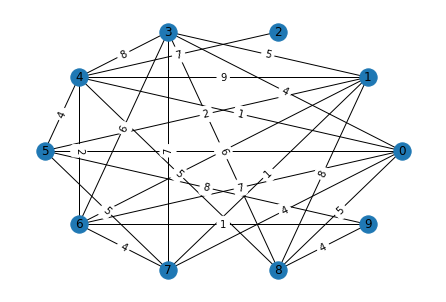

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

pos = nx.circular_layout(G_nx)  # positions for all nodes
nx.draw(G_nx,with_labels=True,pos=pos)
labels = nx.get_edge_attributes(G_nx,'weight')
nx.draw_networkx_edge_labels(G_nx,pos,edge_labels=labels)

plt.show()

In [18]:
start=0
path,distance=dijkstra(G,start)
distance

{0: 0, 1: 5, 2: 8, 3: 4, 4: 1, 5: 5, 6: 3, 7: 4, 8: 5, 9: 4}

In [19]:
path,distance=bellman_ford(G,start)
distance

{0: 0, 1: 5, 2: 8, 3: 4, 4: 1, 5: 5, 6: 3, 7: 4, 8: 5, 9: 4}

In [20]:
length, path = nx.single_source_dijkstra(G_nx, 0,weight='weight')
length

{0: 0, 4: 1, 6: 3, 3: 4, 7: 4, 9: 4, 8: 5, 5: 5, 1: 5, 2: 8}

In [14]:
import time

n=100
# 1- probabilidad de crear aristas
p=0.3

G_nx=gen_random_graph(n,p)
E={(u,v):k['weight'] for (u,v,k) in G_nx.edges(data=True)}
G=weighted_graph(E)

t1=time.time()
p,d=dijkstra(G,0)
t2=time.time()
print('Dijkstra Tiempo : {0:0.5f}'.format(t2-t1))

t3=time.time()
p,d=bellman_ford(G,0)
t4=time.time()
print('Bellman Ford Tiempo : {0:0.5f}'.format(t4-t3))

Dijkstra Tiempo : 0.02300
Bellman Ford Tiempo : 0.11891


# Tarea

En esta tarea Ud. debe comprobar las siguientes hipótesis:

    1.) La complejidad del algoritmo Dijsktra depende de la cantidad de aristas del grafo.
    2.) El peor caso del algoritmo Bellman-Ford se produce cuando el grafo es denso (gran cantidad de aristas).
    3.) Cuando se requiere calcular las distancias más cortas entre todos los vértices del grafo, independiente de la cantidad de vértices el algoritmo Floyd-Warshall mejora el tiempo de ejecución de la fuerza bruta.